# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins = penguins.dropna()
penguins['year'] = penguins['year'].astype('object')

In [36]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [4]:
# Code Here
## Preprocessing: One-Hot-Encode
## Model Spec: K Nearest k = 3

X = penguins.drop("species", axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 3)

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model_3 = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=3))
]).set_output(transform="pandas")



In [5]:
fitted_kn_3 = knn_model_3.fit(X_train, y_train)
preds_kn_3 = fitted_kn_3.predict(X_test)

In [6]:
confusion_matrix(y_test, preds_kn_3)


array([[37,  0,  0],
       [ 3, 14,  0],
       [ 0,  0, 30]])

In [7]:
scores = abs(cross_val_score(knn_model_3, X, y, cv=5, scoring='accuracy'))
print(scores.mean())

0.9819990954319312


In [8]:
print(classification_report(y_test, preds_kn_3))

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        37
   Chinstrap       1.00      0.82      0.90        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [9]:
y_score = fitted_kn_3.predict_proba(X_test)
auc_kn_3 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_kn_3

0.9866499791405925

In [10]:
## Model Spec: K Nearest k = 10

X = penguins.drop("species", axis = 1)
y = penguins["species"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model_10 = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=10))
]).set_output(transform="pandas")


In [11]:
fitted_kn_10 = knn_model_10.fit(X_train, y_train)
preds_kn_10 = fitted_kn_10.predict(X_test)

In [12]:
confusion_matrix(y_test, preds_kn_10)

array([[37,  0,  0],
       [ 2, 15,  0],
       [ 0,  0, 30]])

In [13]:
scores = abs(cross_val_score(knn_model_10, X, y, cv=5, scoring='accuracy'))
print(scores.mean())

0.9880144730891001


In [14]:
print(classification_report(y_test, preds_kn_10))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        37
   Chinstrap       1.00      0.88      0.94        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.98      0.96      0.97        84
weighted avg       0.98      0.98      0.98        84



In [15]:
y_score = fitted_kn_10.predict_proba(X_test)
auc_kn_10 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_kn_10

1.0

In [16]:
## Model Spec: Decision Tree min_samples_leaf = 4

X = penguins.drop("species", axis=1)
y = penguins["species"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline_1 = Pipeline(
    [("preprocessing", ct),
     ("decision_tree", DecisionTreeClassifier(min_samples_leaf = 4, random_state=42))]
).set_output(transform="pandas")


In [17]:
fitted_tree_1 = tree_pipeline_1.fit(X_train, y_train)
preds_tree_1 = fitted_tree_1.predict(X_test)

In [18]:
confusion_matrix(y_test, preds_tree_1)

array([[36,  0,  1],
       [ 4, 13,  0],
       [ 0,  0, 30]])

In [19]:
scores = abs(cross_val_score(tree_pipeline_1, X, y, cv=5, scoring='accuracy'))
print(scores.mean())

0.9519674355495251


In [20]:
print(classification_report(y_test, preds_tree_1))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.94        37
   Chinstrap       1.00      0.76      0.87        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.94        84
   macro avg       0.96      0.91      0.93        84
weighted avg       0.94      0.94      0.94        84



In [21]:
y_score = fitted_tree_1.predict_proba(X_test)
auc_tree_1 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_tree_1

0.9768341916471731

In [22]:
## Model Spec: Decision Tree min_samples_leaf = 20

X = penguins.drop("species", axis=1)
y = penguins["species"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline_2 = Pipeline(
    [("preprocessing", ct),
     ("decision_tree", DecisionTreeClassifier(min_samples_leaf = 20, random_state=42))]
).set_output(transform="pandas")



In [23]:
fitted_tree_2 = tree_pipeline_2.fit(X_train, y_train)
preds_tree_2 = fitted_tree_2.predict(X_test)

In [24]:
confusion_matrix(y_test, preds_tree_2)

array([[36,  0,  1],
       [ 4, 13,  0],
       [ 0,  0, 30]])

In [25]:
scores = abs(cross_val_score(tree_pipeline_2, X, y, cv=5, scoring='accuracy'))
print(scores.mean())

0.9368159203980099


In [26]:
print(classification_report(y_test, preds_tree_2))

              precision    recall  f1-score   support

      Adelie       0.90      0.97      0.94        37
   Chinstrap       1.00      0.76      0.87        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.94        84
   macro avg       0.96      0.91      0.93        84
weighted avg       0.94      0.94      0.94        84



In [27]:
y_score = fitted_tree_2.predict_proba(X_test)
auc_tree_2 = roc_auc_score(y_test, y_score, multi_class='ovr')
auc_tree_2

0.9701946354268806

In [28]:
from sklearn.preprocessing import label_binarize

#binarize
species_names = ['Adelie', 'Chinstrap', 'Gentoo']
y_bin = label_binarize(y, classes=species_names)
y_test_bin = label_binarize(y_test, classes=species_names)

#extract the column corresponding to 'Adelie'
idx_adelie = species_names.index('Adelie')
y_bin_adelie = y_bin[:, idx_adelie]
y_test_bin_adelie = y_test_bin[:, idx_adelie]

In [38]:
#compute ROC metrics for kn_pipeline_1
y_score_adelie_kn3 = fitted_kn_3.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_kn3, tpr_adelie_kn3, _ = roc_curve(y_test_bin_adelie, y_score_adelie_kn3)
roc_auc_adelie_kn3 = auc(fpr_adelie_kn3, tpr_adelie_kn3)

#compute ROC metrics for kn_pipeline_2
y_score_adelie_kn10 = fitted_kn_10.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_kn10, tpr_adelie_kn10, _ = roc_curve(y_test_bin_adelie, y_score_adelie_kn10)
roc_auc_adelie_kn10 = auc(fpr_adelie_kn10, tpr_adelie_kn10)

#compute ROC metrics for dtree_pipeline_1
y_score_adelie_t1 = fitted_tree_1.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_t1, tpr_adelie_t1, _ = roc_curve(y_test_bin_adelie, y_score_adelie_t1)
roc_auc_adelie_t1 = auc(fpr_adelie_t1, tpr_adelie_t1)

#compute ROC metrics for dtree_pipeline_2
y_score_adelie_t2 = fitted_tree_2.predict_proba(X_test)[:, idx_adelie]
fpr_adelie_t2, tpr_adelie_t2, _ = roc_curve(y_test_bin_adelie, y_score_adelie_t2)
roc_auc_adelie_t2 = auc(fpr_adelie_t2, tpr_adelie_t2)

In [39]:
data_roc = pd.DataFrame({
    'FPR': np.concatenate([fpr_adelie_kn3, fpr_adelie_kn10, fpr_adelie_t1, fpr_adelie_t2]),
    'TPR': np.concatenate([tpr_adelie_kn3, tpr_adelie_kn10, tpr_adelie_t1, tpr_adelie_t2]),
    'Model': ['KNN k=3'] * len(fpr_adelie_kn3) + ['KNN k=10'] * len(fpr_adelie_kn10) +
             ['Decision Tree Leaf=4'] * len(fpr_adelie_t1) + ['Decision Tree Leaf=20'] * len(fpr_adelie_t2)
})

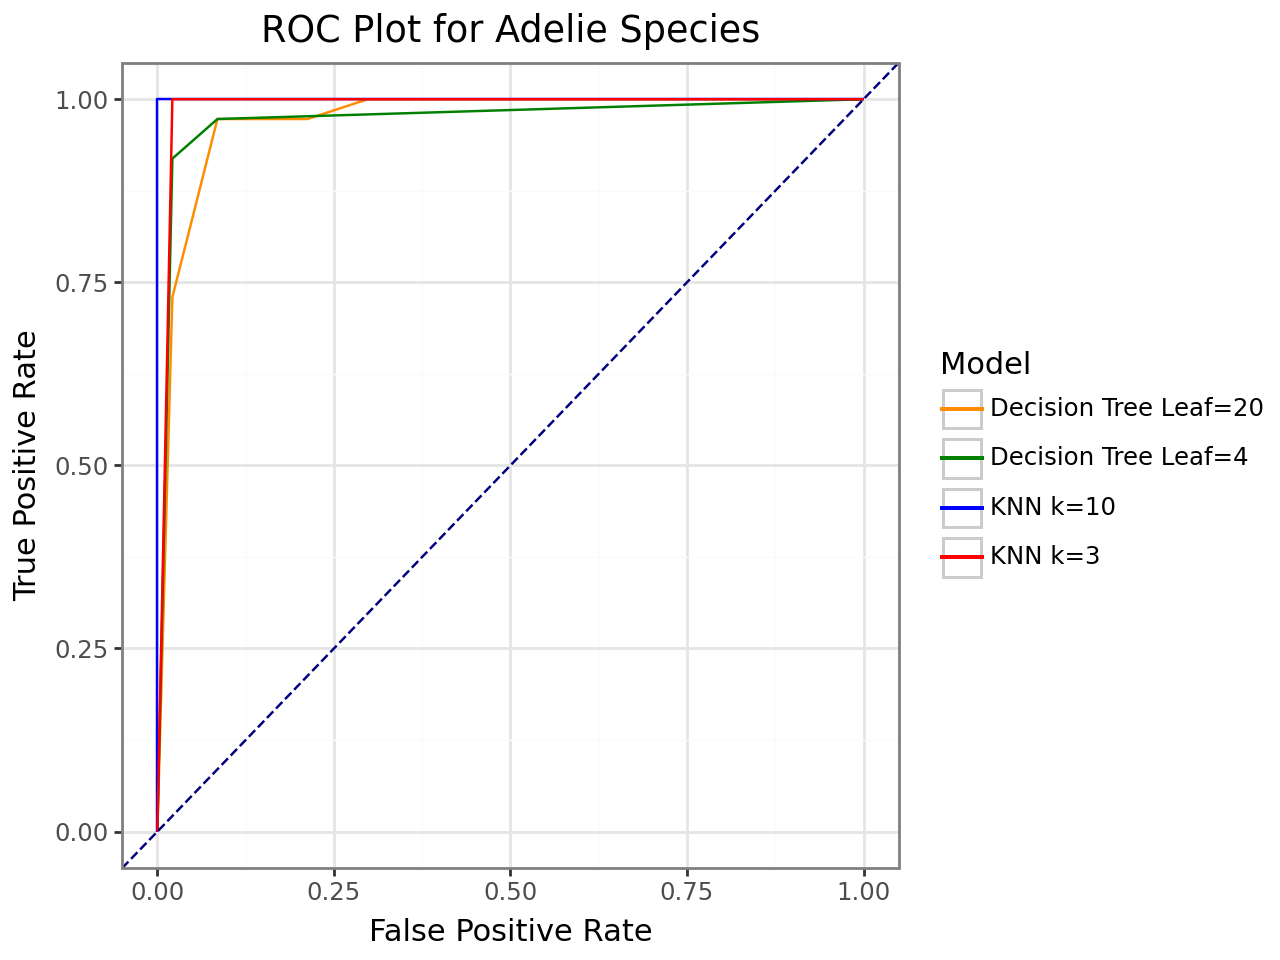

In [40]:
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_bw, scale_color_manual

(ggplot(data_roc, aes(x='FPR', y='TPR', color='Model')) +
    geom_line() + geom_abline(linetype='dashed', color='navy') +
    labs(title='ROC Plot for Adelie Species',
         x='False Positive Rate',
         y='True Positive Rate') +
    theme_bw() +
    scale_color_manual(values=['darkorange', 'green', 'blue', 'red'])
)